In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e9/sample_submission.csv
/kaggle/input/playground-series-s3e9/train.csv
/kaggle/input/playground-series-s3e9/test.csv
/kaggle/input/predict-concrete-strength/ConcreteStrengthData.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e9/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e9/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s3e9/sample_submission.csv')
addition_data = pd.read_csv('/kaggle/input/predict-concrete-strength/ConcreteStrengthData.csv')

train_df['is_generated'] = 1
test_df['is_generated'] = 1
addition_data['is_generated'] = 0

In [3]:
addition_data['CementComponent'] = addition_data['CementComponent ']
addition_data = addition_data.drop('CementComponent ', axis=1)

In [4]:
train_df = pd.concat([train_df, addition_data],axis=0, ignore_index=True)
train_df = train_df.drop('id', axis=1)

In [5]:
cols = ['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays', 'is_generated']

In [6]:
dup_df = train_df.merge(test_df, how='inner', on=cols).set_index('id')
dup_df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,is_generated
id,,,,,,,,,,
6933,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52,1
5652,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05,1
7463,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05,1
5652,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,41.05,1
7463,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,41.05,1
...,...,...,...,...,...,...,...,...,...,...
6199,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,3,14.64,1
8772,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,3,14.64,1
5599,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,23.14,1


In [7]:
df = pd.concat([train_df, test_df], axis=0)
df = df.drop('id', axis=1)
df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,is_generated
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38,1
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52,1
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96,1
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05,1
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19,1
...,...,...,...,...,...,...,...,...,...,...
3600,140.0,129.0,100.0,200.0,7.0,864.0,753.0,28,NaN,1
3601,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28,NaN,1
3602,289.0,133.0,0.0,194.0,7.0,924.0,760.0,28,NaN,1
3603,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,NaN,1


In [8]:
df['Water_Cement'] = df['WaterComponent']/df['CementComponent']
df['Coarse_Fine'] = df['CoarseAggregateComponent']/df['FineAggregateComponent']
df['Aggregate'] = df['CoarseAggregateComponent'] + df['FineAggregateComponent']
df['Aggregate_Cement'] = df['Aggregate']/df['CementComponent']
df['Slag_Cement'] = df['BlastFurnaceSlag']/df['CementComponent']
df['Ash_Cement'] = df['FlyAshComponent']/df['CementComponent']
df['Plastic_Cement'] = df['SuperplasticizerComponent']/df['CementComponent']
df['Age_Water'] = df['AgeInDays']/df['WaterComponent']

<AxesSubplot:>

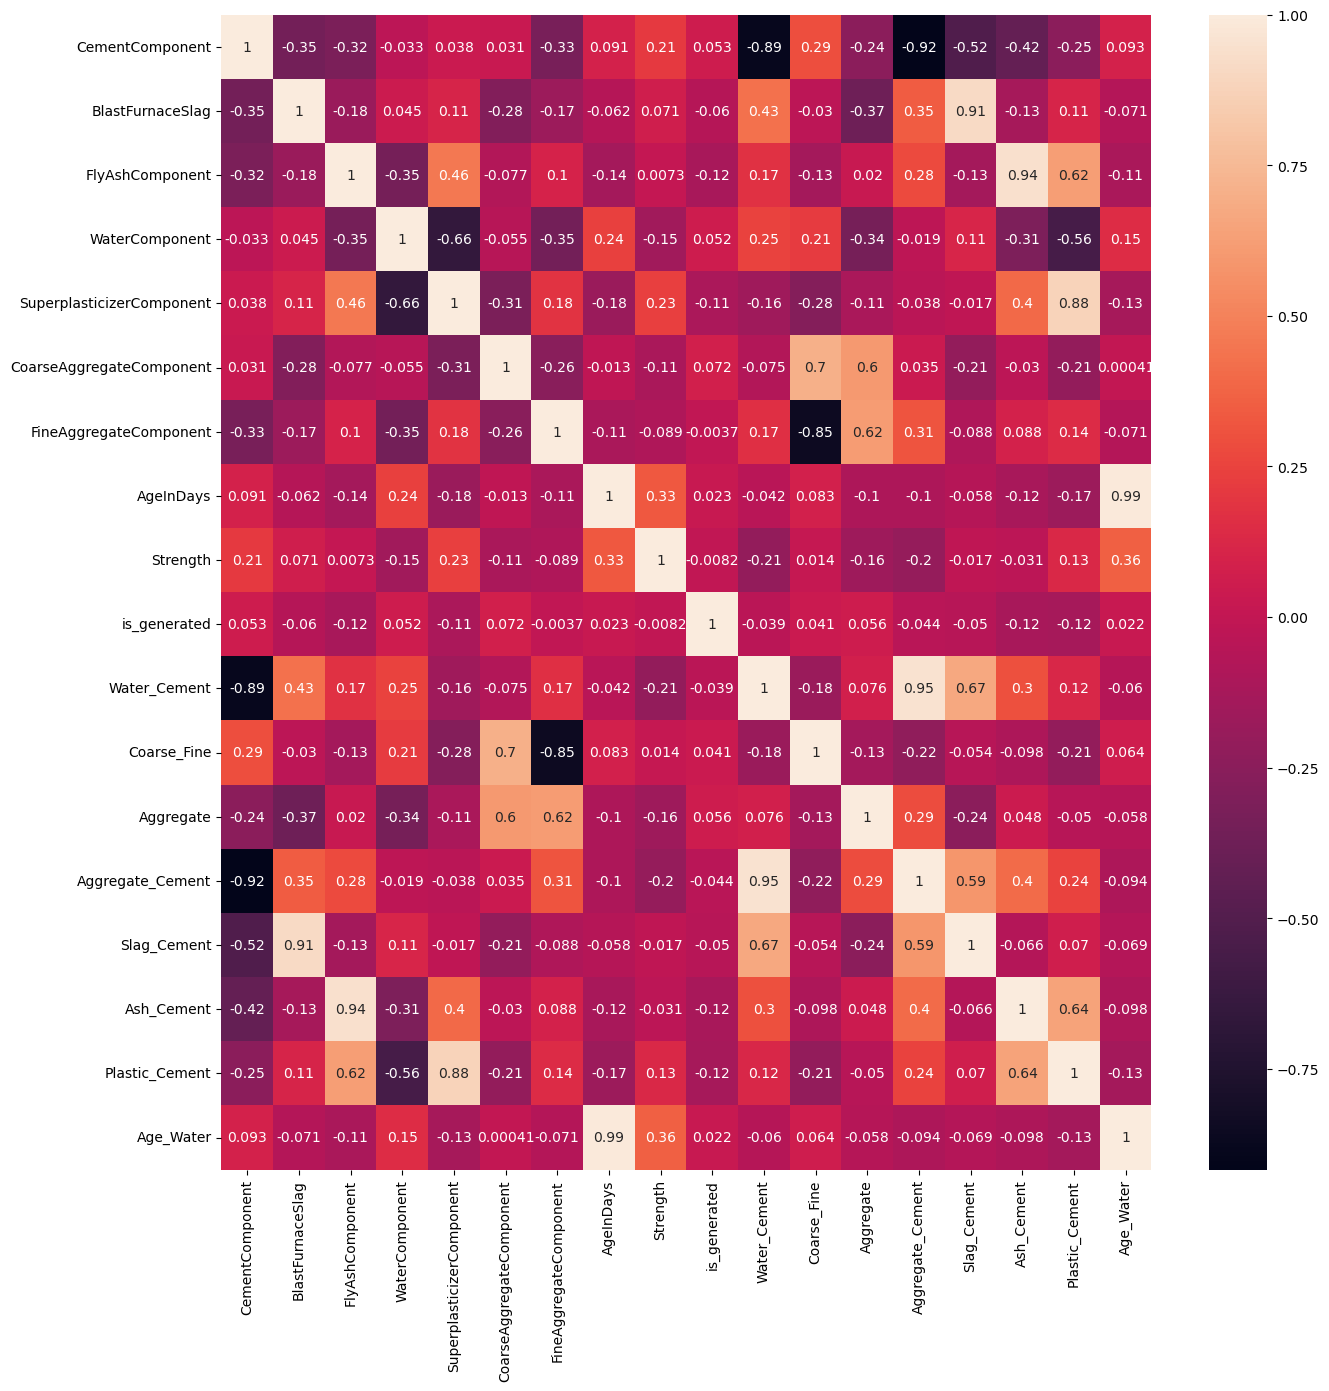

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(df.corr(), annot=True)

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# scaler = StandardScaler()
scaler = RobustScaler()

y = df['Strength']
df = df.drop(['Strength'], axis=1)

# df[df.columns] = scaler.fit_transform(df[df.columns])

In [11]:
train_df = df.iloc[:-len(test_df),:]
train_df['Strength'] = y[:-len(test_df)]
test_df = df.iloc[-len(test_df):,:].reset_index(drop=True)


X = train_df.drop(['Strength'], axis=1)
y = train_df.Strength.astype('int')
X_test = test_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
from sklearn.model_selection import train_test_split

# X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# X, y = X_train, y_train
# X1, y1 = X_test1, y_test1

In [13]:
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold

n_folds = 2 #5
repeats = 5 #5

In [14]:
import catboost

PATIENCE = 100

modelsCB = []
predsCB = []

k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeats, random_state=42) 

gpu_params = {'task_type' : "GPU", 'devices' : '0:1'}
cbr_params = {'iterations': 2000, 
              'max_depth': 7, #4, #10,
              'learning_rate': 0.0036012104807528686, #0.03725416892898261, #0.01,
              'verbose': 100,
              'subsample': 0.6215023014443006,
              'l2_leaf_reg': 0.7998684766493955
#               **gpu_params
             }

for train_index, test_index in k_fold.split(X, y):
#     X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_valid = y.iloc[train_index], y.iloc[test_index]


    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
    
    model = catboost.CatBoostRegressor(**cbr_params)
    
    model.fit(X=X_train, y=y_train,
          eval_set=[(X_valid, y_valid)],
          early_stopping_rounds = PATIENCE,
         )
    modelsCB.append(model)
    predsCB.append(model.predict(X_test))

0:	learn: 16.4114153	test: 16.4818041	best: 16.4818041 (0)	total: 60.8ms	remaining: 2m 1s
100:	learn: 14.3350598	test: 14.3470951	best: 14.3470951 (100)	total: 452ms	remaining: 8.51s
200:	learn: 13.1022517	test: 13.0644642	best: 13.0644642 (200)	total: 827ms	remaining: 7.4s
300:	learn: 12.3631060	test: 12.2840092	best: 12.2840092 (300)	total: 1.2s	remaining: 6.78s
400:	learn: 11.9207031	test: 11.8239620	best: 11.8239620 (400)	total: 1.56s	remaining: 6.23s
500:	learn: 11.6461030	test: 11.5429278	best: 11.5429278 (500)	total: 1.93s	remaining: 5.79s
600:	learn: 11.4608473	test: 11.3613251	best: 11.3613251 (600)	total: 2.31s	remaining: 5.38s
700:	learn: 11.3297933	test: 11.2476538	best: 11.2476538 (700)	total: 2.69s	remaining: 4.98s
800:	learn: 11.2310638	test: 11.1698425	best: 11.1698425 (800)	total: 3.06s	remaining: 4.58s
900:	learn: 11.1561244	test: 11.1203406	best: 11.1203406 (900)	total: 3.44s	remaining: 4.2s
1000:	learn: 11.0918928	test: 11.0845134	best: 11.0845134 (1000)	total: 3.81

In [15]:
feature_importance =  [modelsCB[x].feature_importances_ for x in range(n_folds*repeats)]
feature_importance = np.average(feature_importance,axis=0)
feature_importance

array([ 3.97622778,  2.99287806,  1.63700955,  4.16272771,  4.4813562 ,
        2.38627807,  2.7643508 , 18.83646566,  6.23424734,  7.17463706,
        2.21790638,  2.52538218,  4.58412229,  2.65979896,  1.65101621,
        3.40897478, 28.30662098])

Text(0.5, 1.0, 'Feature Importance')

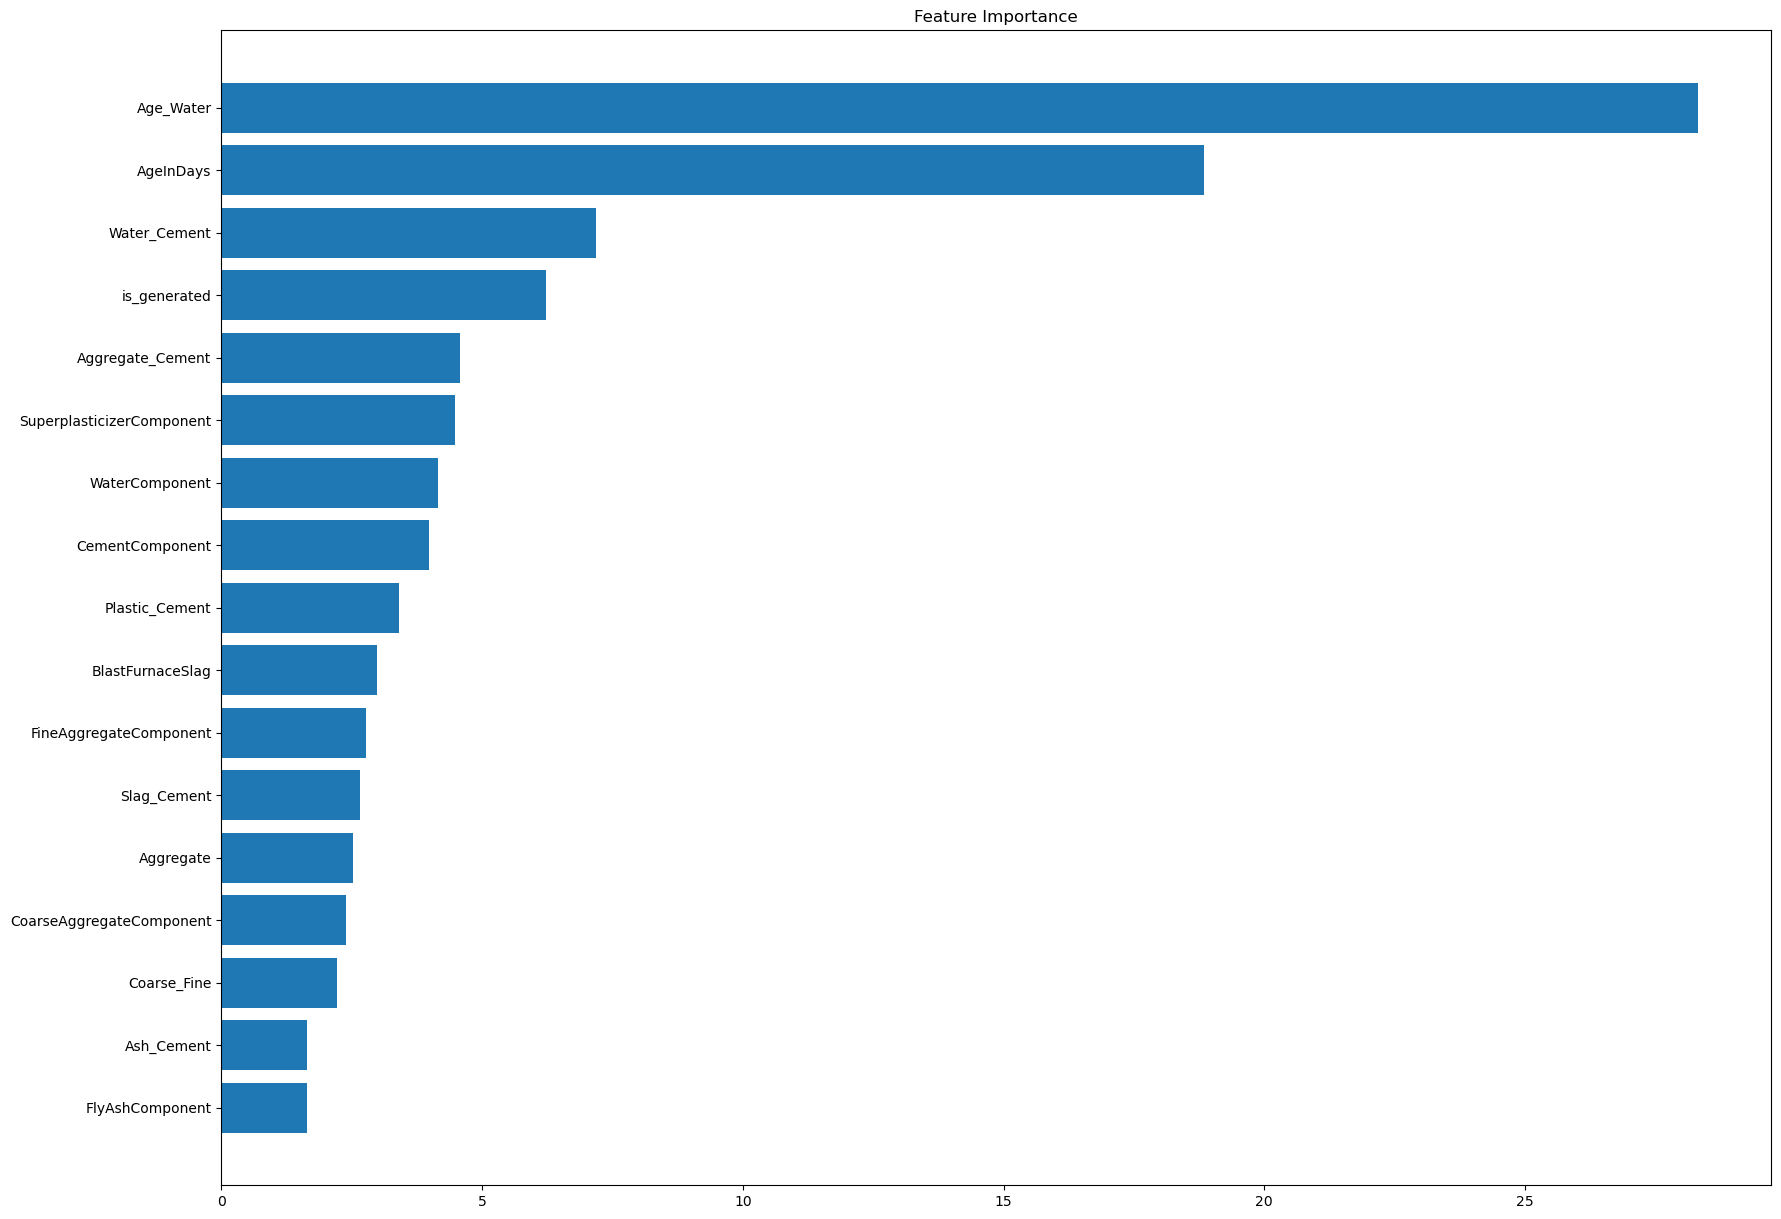

In [16]:
import matplotlib.pyplot as plt

# feature_importance = modelsCBC[0].feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [17]:
from xgboost import XGBClassifier, XGBRegressor

k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeats, random_state=42) 

modelsXB = []
predsXB = []

PATIENCE = 50

xgbr_params = {'n_estimators': 3000, 
               'max_depth': 7, #3, #5,
               'learning_rate': 0.001799617233606817, #0.25, #0.005, 
#                'subsample': 0.8291850469303983,
#                'tree_method': 'gpu_hist'
              }


for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model = XGBRegressor(**xgbr_params)
    
    model.fit(X=X_train, y=y_train,
          eval_set=[(X_valid, y_valid)],
          early_stopping_rounds = PATIENCE,
          verbose = 100
         )
    modelsXB.append(model)
    predsXB.append(model.predict(X_test))

[0]	validation_0-rmse:38.16730


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[100]	validation_0-rmse:32.57630
[200]	validation_0-rmse:28.00788
[300]	validation_0-rmse:24.29279
[400]	validation_0-rmse:21.31162
[500]	validation_0-rmse:18.94493
[600]	validation_0-rmse:17.07983
[700]	validation_0-rmse:15.64800
[800]	validation_0-rmse:14.56585
[900]	validation_0-rmse:13.76775
[1000]	validation_0-rmse:13.17806
[1100]	validation_0-rmse:12.74196
[1200]	validation_0-rmse:12.42913
[1300]	validation_0-rmse:12.20689
[1400]	validation_0-rmse:12.04695
[1500]	validation_0-rmse:11.94400
[1600]	validation_0-rmse:11.87032
[1700]	validation_0-rmse:11.82087
[1800]	validation_0-rmse:11.78806
[1900]	validation_0-rmse:11.76665
[2000]	validation_0-rmse:11.75540
[2100]	validation_0-rmse:11.74999
[2172]	validation_0-rmse:11.75114
[0]	validation_0-rmse:38.17263
[100]	validation_0-rmse:32.58490
[200]	validation_0-rmse:28.02774
[300]	validation_0-rmse:24.32313
[400]	validation_0-rmse:21.36021
[500]	validation_0-rmse:19.01078
[600]	validation_0-rmse:17.15867
[700]	validation_0-rmse:15.72100

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[100]	validation_0-rmse:32.49411
[200]	validation_0-rmse:27.86381
[300]	validation_0-rmse:24.13042
[400]	validation_0-rmse:21.13325
[500]	validation_0-rmse:18.75869
[600]	validation_0-rmse:16.90070
[700]	validation_0-rmse:15.47956
[800]	validation_0-rmse:14.41984
[900]	validation_0-rmse:13.63389
[1000]	validation_0-rmse:13.06167
[1100]	validation_0-rmse:12.64917
[1200]	validation_0-rmse:12.35684
[1300]	validation_0-rmse:12.15376
[1400]	validation_0-rmse:12.01433
[1500]	validation_0-rmse:11.91701
[1600]	validation_0-rmse:11.84605
[1700]	validation_0-rmse:11.80620
[1800]	validation_0-rmse:11.78233
[1900]	validation_0-rmse:11.76629
[2000]	validation_0-rmse:11.75707
[2099]	validation_0-rmse:11.75512
[0]	validation_0-rmse:38.17351
[100]	validation_0-rmse:32.67740
[200]	validation_0-rmse:28.17777
[300]	validation_0-rmse:24.52656
[400]	validation_0-rmse:21.58633
[500]	validation_0-rmse:19.24479
[600]	validation_0-rmse:17.40353
[700]	validation_0-rmse:15.96065
[800]	validation_0-rmse:14.86078


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[100]	validation_0-rmse:32.59043
[200]	validation_0-rmse:28.03059
[300]	validation_0-rmse:24.33084
[400]	validation_0-rmse:21.35623
[500]	validation_0-rmse:18.97942
[600]	validation_0-rmse:17.12278
[700]	validation_0-rmse:15.68180
[800]	validation_0-rmse:14.58290
[900]	validation_0-rmse:13.76015
[1000]	validation_0-rmse:13.13794
[1100]	validation_0-rmse:12.68823
[1200]	validation_0-rmse:12.36281
[1300]	validation_0-rmse:12.12198
[1400]	validation_0-rmse:11.93985
[1500]	validation_0-rmse:11.81467
[1600]	validation_0-rmse:11.73035
[1700]	validation_0-rmse:11.67159
[1800]	validation_0-rmse:11.63362
[1900]	validation_0-rmse:11.60883
[2000]	validation_0-rmse:11.58888
[2100]	validation_0-rmse:11.57752
[2200]	validation_0-rmse:11.57098
[2300]	validation_0-rmse:11.56714
[2400]	validation_0-rmse:11.56609
[2424]	validation_0-rmse:11.56699
[0]	validation_0-rmse:38.17271
[100]	validation_0-rmse:32.61956
[200]	validation_0-rmse:28.08440
[300]	validation_0-rmse:24.41542
[400]	validation_0-rmse:21.45

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[100]	validation_0-rmse:32.55911
[200]	validation_0-rmse:27.99415
[300]	validation_0-rmse:24.28905
[400]	validation_0-rmse:21.30115
[500]	validation_0-rmse:18.94046
[600]	validation_0-rmse:17.09948
[700]	validation_0-rmse:15.67504
[800]	validation_0-rmse:14.59783
[900]	validation_0-rmse:13.78286
[1000]	validation_0-rmse:13.18602
[1100]	validation_0-rmse:12.75460
[1200]	validation_0-rmse:12.43883
[1300]	validation_0-rmse:12.21143
[1400]	validation_0-rmse:12.04842
[1500]	validation_0-rmse:11.94087
[1600]	validation_0-rmse:11.86600
[1700]	validation_0-rmse:11.81623
[1800]	validation_0-rmse:11.77600
[1900]	validation_0-rmse:11.75042
[2000]	validation_0-rmse:11.73386
[2100]	validation_0-rmse:11.72867
[2200]	validation_0-rmse:11.72479
[2300]	validation_0-rmse:11.72483
[2336]	validation_0-rmse:11.72669
[0]	validation_0-rmse:38.17270
[100]	validation_0-rmse:32.61090
[200]	validation_0-rmse:28.07893
[300]	validation_0-rmse:24.40886
[400]	validation_0-rmse:21.44988
[500]	validation_0-rmse:19.092

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[100]	validation_0-rmse:32.59268
[200]	validation_0-rmse:28.04957
[300]	validation_0-rmse:24.36359
[400]	validation_0-rmse:21.41536
[500]	validation_0-rmse:19.05131
[600]	validation_0-rmse:17.20100
[700]	validation_0-rmse:15.77699
[800]	validation_0-rmse:14.67367
[900]	validation_0-rmse:13.84420
[1000]	validation_0-rmse:13.22448
[1100]	validation_0-rmse:12.77484
[1200]	validation_0-rmse:12.46005
[1300]	validation_0-rmse:12.22872
[1400]	validation_0-rmse:12.05469
[1500]	validation_0-rmse:11.93264
[1600]	validation_0-rmse:11.84657
[1700]	validation_0-rmse:11.78509
[1800]	validation_0-rmse:11.73926
[1900]	validation_0-rmse:11.70390
[2000]	validation_0-rmse:11.68267
[2100]	validation_0-rmse:11.66807
[2200]	validation_0-rmse:11.65353
[2300]	validation_0-rmse:11.64614
[2400]	validation_0-rmse:11.64464
[2500]	validation_0-rmse:11.64191
[2523]	validation_0-rmse:11.64237
[0]	validation_0-rmse:38.17254
[100]	validation_0-rmse:32.58662
[200]	validation_0-rmse:28.02426
[300]	validation_0-rmse:24.3

In [18]:
import lightgbm as lgbm
k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeats, random_state=42) 

modelsLB = []
predsLB = []

PATIENCE = 50

gpu_params = {'device' : "gpu"}
lgbr_params = {'n_estimators': 10000, 
               'metric': 'rmse',
               'max_depth': 10, 
               'num_leaves': 8,
               'learning_rate': 0.01,
               'subsample': 0.944652288803578,
               'lambda_l1': 3,
               'lambda_l2': 3,
               'bagging_fraction': 0.8, 
               'feature_fraction': 0.8,
#                **gpu_params
              }

for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model = lgbm.LGBMRegressor(**lgbr_params)
    
    model.fit(X=X_train, y=y_train,
          eval_set=[(X_valid, y_valid)],
          early_stopping_rounds = PATIENCE,
          verbose = 100
         )
    modelsLB.append(model)
    predsLB.append(model.predict(X_test))
    

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.944652288803578 will be ignored. Current value: bagging_fraction=0.8
[100]	valid_0's rmse: 12.8162
[200]	valid_0's rmse: 11.9787
[300]	valid_0's rmse: 11.7412
[400]	valid_0's rmse: 11.6429
[500]	valid_0's rmse: 11.6024
[600]	valid_0's rmse: 11.5771
[700]	valid_0's rmse: 11.5729
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [W

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.944652288803578 will be ignored. Current value: bagging_fraction=0.8
[100]	valid_0's rmse: 12.8162
[200]	valid_0's rmse: 11.9486
[300]	valid_0's rmse: 11.7086
[400]	valid_0's rmse: 11.6071
[500]	valid_0's rmse: 11.5666
[600]	valid_0's rmse: 11.5484
[700]	valid_0's rmse: 11.5473
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [W

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 12.7553
[200]	valid_0's rmse: 11.8928
[300]	valid_0's rmse: 11.6534
[400]	valid_0's rmse: 11.5112
[500]	valid_0's rmse: 11.4439
[600]	valid_0's rmse: 11.4228
[700]	valid_0's rmse: 11.413
[800]	valid_0's rmse: 11.4126
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.944652288803578 will be ignored. Current value: bagging_fraction=0.8
[100]	valid_0's rmse: 12.9171
[200]	valid_0's rmse: 12.1316
[300]	valid_0's rmse: 11.9277
[400]	valid_0's rmse: 11.86
[500]	valid_0's rmse: 11.8334
[600]	valid_0's rmse: 11.816
[700]	valid_0's rmse: 11.8099
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 12.814
[200]	valid_0's rmse: 11.9852
[300]	valid_0's rmse: 11.7641
[400]	valid_0's rmse: 11.6597
[500]	valid_0's rmse: 11.6058
[600]	valid_0's rmse: 11.574
[700]	valid_0's rmse: 11.5716
[800]	valid_0's rmse: 11.5576
[900]	valid_0's rmse: 11.5559
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.944652288803578 will be ignored. Current value: bagging_fraction=0.8
[100]	valid_0's rmse: 12.87
[200]	valid_0's rmse: 11.972
[300]	valid_0's rmse: 11.7271
[400]	valid_0's rmse: 11.651
[500]	valid_0's rmse: 11.6071
[600]	valid_0's rmse: 11.5898
[700]	valid_0's rmse: 11.5832


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.944652288803578 will be ignored. Current value: bagging_fraction=0.8
[100]	valid_0's rmse: 12.7759
[200]	valid_0's rmse: 11.8492
[300]	valid_0's rmse: 11.5852
[400]	valid_0's rmse: 11.4698
[500]	valid_0's rmse: 11.4051
[600]	valid_0's rmse: 11.3799
[700]	valid_0's rmse: 11.3616
[800]	valid_0's rmse: 11.3531
[900]	valid_0's rmse: 11.3487
[1000]	valid_0's rmse: 11.3428
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] l

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeats, random_state=42) 

modelsSGB = []
predsSGB = []

sgbr_params = {'n_estimators': 500,
          'max_depth': 3,
          'min_samples_split': 3,
          'learning_rate': 0.01,
          'loss': 'squared_error',
          'min_samples_leaf': 3 ,
          'max_features': 'log2'}

par =  {
    'n_estimators': 1000,
    'learning_rate': 0.0095, #0.01
    'min_samples_split': 4, #3,
    'max_features': "sqrt",
    'validation_fraction': 0.2,
    'n_iter_no_change': 5,
    'tol': 0.01,
    'random_state': 0,    
}

for train_index, test_index in k_fold.split(X, y):
#     X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model = GradientBoostingRegressor(**par)
    
    model.fit(X, y)
    modelsSGB.append(model)
    predsSGB.append(model.predict(X_test))

In [20]:
from sklearn.linear_model import LassoCV, Lasso

k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=2*repeats, random_state=42)  

modelsLR = []
predsLR = []

lasso_par = {
        'alpha': 0.06448185915751528,
        'max_iter': 10000,
        'tol': 0.007029268232213037    
    }

MODEL_PARAMS = {
                       'precompute': "auto",
                       'fit_intercept': True,
                       'normalize': False,
                       'max_iter': 10000,
                       'verbose': False,
                       'eps': 0.013,
                       'cv': 3,
                       'n_alphas': 1000,
                       'n_jobs': 8,
#                        'tol': 0.0001
}


for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model = Lasso(**lasso_par)
    
    model.fit(X=X_train, y=y_train,
#           eval_set=[(X_valid, y_valid)],
         )
    
    modelsLR.append(model)
    predsLR.append(model.predict(X_test))

In [21]:
from sklearn.metrics import mean_squared_error
import optuna

 
def coef_objective(trial):
    a = trial.suggest_float('a', 0, 1)
    b = trial.suggest_float('b', 0, 1)
    c = trial.suggest_float('c', 0, 1)
    d = trial.suggest_float('d', 0, 1)
    e = trial.suggest_float('e', 0, 1)

#     X = X1
#     y = y1
    
    preds_eval = []
    for model in modelsCB:
        preds_eval.append(model.predict(X))
    
    resCB = np.average(np.array(preds_eval),axis=0)
    
    preds_eval = []
    for model in modelsXB:
        preds_eval.append(model.predict(X))
    
    resXB = np.average(np.array(preds_eval),axis=0)
    
    preds_eval = []
    for model in modelsLB:
        preds_eval.append(model.predict(X))
    
    resLB = np.average(np.array(preds_eval),axis=0)
    
    preds_eval = []
    for model in modelsSGB:
        preds_eval.append(model.predict(X))
    
    resSGB = np.average(np.array(preds_eval),axis=0)
    
    preds_eval = []
    for model in modelsLR:
        preds_eval.append(model.predict(X))
    
    resLR = np.average(np.array(preds_eval),axis=0)
    
    
    res1 =  (resCB * a + resXB * b + resLB * c + resSGB * d + resLR * e)/(a + b + c + d + e)
    
    res = mean_squared_error(y, res1, squared=False)

    return res

study = optuna.create_study(direction= 'minimize')
# study.optimize(coef_objective, n_trials= 100)

[I 2023-03-08 04:03:39,016] A new study created in memory with name: no-name-09258ce8-df6a-42e3-b952-c0019eb27b9a


In [22]:
a = 1/5
b = 1/5
c = 1/5
d = 1/5
e = 1/5

In [23]:
predCB = np.average(np.array(predsCB),axis=0)
predXB = np.average(np.array(predsXB),axis=0)
predLB = np.average(np.array(predsLB),axis=0)
predLR = np.average(np.array(predsLR),axis=0)
predSGB = np.average(np.array(predsSGB),axis=0)

<AxesSubplot:>

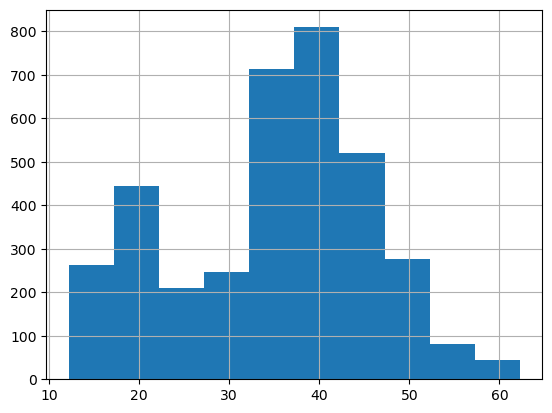

In [24]:
pd.Series(predCB).hist()

In [25]:
pred = predCB * a + predXB * b + predLB * c + predSGB * d + predLR * e

In [26]:
submission['Strength'] = pred
submission

,id,Strength
0,5407,44.859194
1,5408,20.438808
2,5409,31.452599
3,5410,44.445436
4,5411,29.020174
...,...,...
3600,9007,32.253071
3601,9008,32.900107
3602,9009,38.632073
3603,9010,37.454747


In [27]:
# submission.to_csv('submission.csv', index=False)